# Hierarchical Clustering

In [64]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

lemmatizer = WordNetLemmatizer()

In [8]:
stop_words = stopwords.words('english') # 179 elements

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable) # 179+100

In [11]:
# getting the data for these three categories
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories,\
                               shuffle=True, random_state=42, download_if_missing=True)

In [12]:
news_data['data'][:5]

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

In [16]:
news_data.target

array([0, 0, 1, ..., 0, 1, 0])

In [17]:
news_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

In [20]:
Counter(news_data.target)

Counter({0: 585, 1: 591, 2: 377})

In [21]:
#making a df 
news_data_df = pd.DataFrame({'text':news_data['data'],'category':news_data['target']})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [22]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [23]:
news_data_df.head()

,text,category,cleaned_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...


In [24]:
news_data_df.shape

(1553, 3)

In [37]:
# converting text data to numeical data using tfidf 
tfidf_model = TfidfVectorizer(max_features=200)
tfidf = tfidf_model.fit_transform(news_data_df['cleaned_text']).todense()
tfidf_df = pd.DataFrame(tfidf,columns = tfidf_model.get_feature_names())
print(tfidf_df.shape)
tfidf_df.head()

(1553, 200)


,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [43]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist) # this matrix is used in hierarchical clutering

In [44]:
linkage_matrix.shape

(1552, 4)

In [45]:
dist.shape

(1553, 1553)

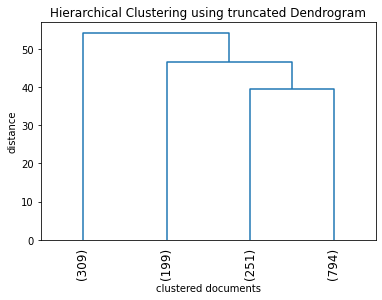

In [58]:
#Truncating the Dendogram Truncation to show last 4 clusters
plt.title('Hierarchical Clustering using truncated Dendrogram')
plt.xlabel('clustered documents')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # showing only last p clusters after merging
    p=4,  # p is the number of cluster that should remain after merging 
    leaf_rotation=90.,
    leaf_font_size=12.
    )
plt.show()

In [59]:
#Let's create 4 cluster from the linkage matrix
k=4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

In [60]:
news_data_df['obtained_clusters'] = clusters

In [61]:
news_data_df.head()

,text,category,cleaned_text,obtained_clusters
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...,3
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...,3
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...,3
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...,1


In [62]:
#Let's validate the cluster we have created with the actual categories
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].\
            replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,155,0,230,200
sci.electronics,110,1,19,461
talk.religion.misc,44,198,2,133


# K means clustering

In [63]:
# lets get back to the tf-idf df again 
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [65]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tfidf_df)
y_kmeans = kmeans.predict(tfidf_df)
news_data_df['obtained_clusters'] = y_kmeans

In [66]:
news_data_df.head()

,text,category,cleaned_text,obtained_clusters
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...,1
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason schechner ...,1
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...,2
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce bostwick subjec...,2
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah yoakam subject...,1


In [67]:
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].replace({0 : 'cluster_1', 1 : 'cluster_2', 2 : 'cluster_3', 3: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,96,359,127,3
sci.electronics,440,9,142,0
talk.religion.misc,70,0,73,234


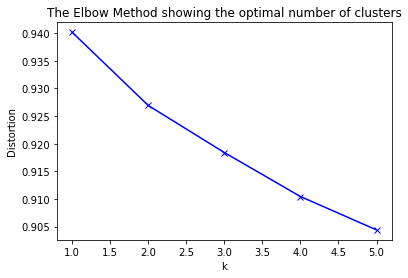

In [68]:
#Using Elbow method to obtain the number of clusters
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist(tfidf_df, kmeanModel.cluster_centers_, 'euclidean'), \
                                  axis=1)) / tfidf_df.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()
#FROM THIS PLOT SELECT K WEHRE THE PLOT HAS STEEPEST SLOPE i.e. 2